In [ ]:
# Howland, Erin
# DSC550
# Wk 5
# 16 Jan 2022

In [2]:
# import libraries
import pandas as pd
import numpy as np

# text blob sentiment analyzer
from textblob import TextBlob

# Bag of Words library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# NLTK libraries
import re
import unicodedata
import sys
import nltk

from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
# import df
df = pd.read_csv(r'C:\GitHub\DSC550\labeledTrainData.tsv', sep='\t')
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


In [4]:
# load reviews to TextBlob
review_blob=[TextBlob(review) for review in df['review']]

# add sentiment metrics to df
df['tb_Pol'] = [b.sentiment.polarity for b in review_blob]
df['tb_Subj'] = [b.sentiment.subjectivity for b in review_blob]

df.head()

,id,sentiment,review,tb_Pol,tb_Subj
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818


In [5]:
# tb_sent is pos if pol >= 0
# tb_sent is neg if pol < 0
df['tb_Sentiment'] = (df['tb_Pol'] >= 0).astype(int)
df

,id,sentiment,review,tb_Pol,tb_Subj,tb_Sentiment
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0
...,...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,0.102083,0.542857,1
24996,5064_1,0,I don't believe they made this film. Completel...,0.090813,0.462371,1
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",0.145256,0.484103,1
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,0.065625,0.504514,1


In [6]:
blob_accuracy = accuracy_score(df['sentiment'], df['tb_Sentiment'])
print('TextBlob Accuracy:', blob_accuracy)

TextBlob Accuracy: 0.68524


In [7]:
# fn to make text lowercase and to remove punctuation and any superfluous white space

def clean_text(text):
    # make lower case
    text = text.lower()
    # remove superfluous white space
    text = re.sub('\\d|\\W+|_',' ', text)
    # remove punctuation
    text = re.sub('[^a-zA-Z0-9]'," ", text)
    
    return text

In [8]:
# fn to tokenize and remove stop words
def tokenize(txt):
    stop_words = stopwords.words('english')
    tokenize_txt = word_tokenize(txt)
    no_stopwords = [word for word in tokenize_txt if word not in stop_words]
    
    return no_stopwords

In [9]:
#fn to apply porter stemmer
def stemmed(word_list):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in word_list]

In [10]:
# show column for each step
df['cleaned'] = df['review'].apply(clean_text)
df['tokenized'] = df['cleaned'].apply(tokenize)
df['stemmed'] = df['tokenized'].apply(stemmed)
df

,id,sentiment,review,tb_Pol,tb_Subj,tb_Sentiment,cleaned,tokenized,stemmed
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc..."
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope..."
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi..."
...,...,...,...,...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,0.102083,0.542857,1,it seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie...","[seem, like, consider, gone, imdb, review, fil..."
24996,5064_1,0,I don't believe they made this film. Completel...,0.090813,0.462371,1,i don t believe they made this film completely...,"[believe, made, film, completely, unnecessary,...","[believ, made, film, complet, unnecessari, fir..."
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",0.145256,0.484103,1,guy is a loser can t get girls needs to build ...,"[guy, loser, get, girls, needs, build, picked,...","[guy, loser, get, girl, need, build, pick, str..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,0.065625,0.504514,1,this minute documentary bu uel made in the ...,"[minute, documentary, bu, uel, made, early, on...","[minut, documentari, bu, uel, made, earli, one..."


In [11]:
# "unlisted" for final review
df['for_review'] = df['stemmed'].apply(lambda text: ' '.join(text))
df

,id,sentiment,review,tb_Pol,tb_Subj,tb_Sentiment,cleaned,tokenized,stemmed,for_review
0,5814_8,1,With all this stuff going down at the moment w...,0.001277,0.606746,1,with all this stuff going down at the moment w...,"[stuff, going, moment, mj, started, listening,...","[stuff, go, moment, mj, start, listen, music, ...",stuff go moment mj start listen music watch od...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",0.256349,0.531111,1,the classic war of the worlds by timothy hine...,"[classic, war, worlds, timothy, hines, enterta...","[classic, war, world, timothi, hine, entertain...",classic war world timothi hine entertain film ...
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,-0.053941,0.562933,0,the film starts with a manager nicholas bell g...,"[film, starts, manager, nicholas, bell, giving...","[film, start, manag, nichola, bell, give, welc...",film start manag nichola bell give welcom inve...
3,3630_4,0,It must be assumed that those who praised this...,0.134753,0.492901,1,it must be assumed that those who praised this...,"[must, assumed, praised, film, greatest, filme...","[must, assum, prais, film, greatest, film, ope...",must assum prais film greatest film opera ever...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,-0.024842,0.459818,0,superbly trashy and wondrously unpretentious ...,"[superbly, trashy, wondrously, unpretentious, ...","[superbl, trashi, wondrous, unpretenti, exploi...",superbl trashi wondrous unpretenti exploit hoo...
...,...,...,...,...,...,...,...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...,0.102083,0.542857,1,it seems like more consideration has gone into...,"[seems, like, consideration, gone, imdb, revie...","[seem, like, consider, gone, imdb, review, fil...",seem like consider gone imdb review film went ...
24996,5064_1,0,I don't believe they made this film. Completel...,0.090813,0.462371,1,i don t believe they made this film completely...,"[believe, made, film, completely, unnecessary,...","[believ, made, film, complet, unnecessari, fir...",believ made film complet unnecessari first fil...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil...",0.145256,0.484103,1,guy is a loser can t get girls needs to build ...,"[guy, loser, get, girls, needs, build, picked,...","[guy, loser, get, girl, need, build, pick, str...",guy loser get girl need build pick stronger su...
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...,0.065625,0.504514,1,this minute documentary bu uel made in the ...,"[minute, documentary, bu, uel, made, early, on...","[minut, documentari, bu, uel, made, earli, one...",minut documentari bu uel made earli one spain ...


In [12]:
# create the bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(df['for_review'])

#check the shape of the output
bag_of_words.shape

(25000, 49638)

In [13]:
# training anad visualization libraries
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
# we want to analyse for_review column to predict sentiment - other columns don't seem to particularly matter, so will ignore
df_model = df[['sentiment', 'for_review']]
df_model

,sentiment,for_review
0,1,stuff go moment mj start listen music watch od...
1,1,classic war world timothi hine entertain film ...
2,0,film start manag nichola bell give welcom inve...
3,0,must assum prais film greatest film opera ever...
4,1,superbl trashi wondrous unpretenti exploit hoo...
...,...,...
24995,0,seem like consider gone imdb review film went ...
24996,0,believ made film complet unnecessari first fil...
24997,0,guy loser get girl need build pick stronger su...
24998,0,minut documentari bu uel made earli one spain ...


In [48]:
# split into training and test set - will use 80-20 split
# randomly split between training and test dataset

# drop sentiment from the features as it is the target
X = df_model.drop(['sentiment'], axis = 1)
#get the target
y = df_model['sentiment']

# split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X['for_review'], y, test_size = 0.2)

# reset indices in the training and test sets to prevent pandas slicing warnings
# X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
# X_test = X_test.reset_index(drop = True)
# y_train = y_train.reset_index(drop = True)
# y_test = y_test.reset_index(drop = True)

In [49]:
type(X_train)

pandas.core.series.Series

In [50]:
# show the sizes of the training and test sets to verify is 80% of original data
print(X_train.shape)
print(X_test.shape)

(20000,)
(5000,)


In [51]:
# view training features
X_train.head()

4108     key joy beauti pain sad life abil accept life ...
7669     expect love movi film noir serial killer dark ...
13843    watch dvd program proper may minut good inform...
11719    anyon watch lifetim movi network movi know plo...
4979     dude mst k see dog film basic dopey hack actor...
Name: for_review, dtype: object

0    10025
1     9975
Name: sentiment, dtype: int64


C:\Users\howla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


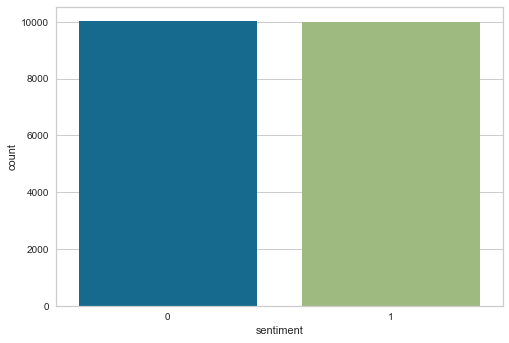

In [52]:
# visualize sentiment in training data
sns.countplot(y_train)

print(y_train.value_counts())

C:\Users\howla\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    2525
0    2475
Name: sentiment, dtype: int64


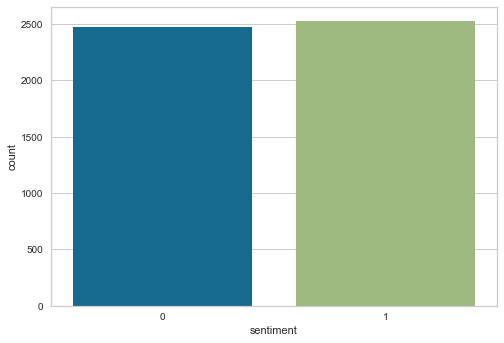

In [53]:
# visualize sentiment in test data
sns.countplot(y_test)

print(y_test.value_counts())

In [54]:
# import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
y_test.shape

(5000,)

In [42]:
# apply tfidf vectorization to training set
# max features as 20k - 80% of 25k
# ngrams as 1,2 - unigrams and bigrams
vectorizer = TfidfVectorizer()

train_features = vectorizer.fit_transform(X_train)

print(train_features.shape)

(20000, 45391)


In [43]:
# apply (NO FITTING) tfidf vectorization to test set
# avoids data snooping
test_features = vectorizer.transform(X_test)

print(test_features.shape)

(5000, 45391)


In [44]:
# define model
logr_model = LogisticRegression(random_state = 0, 
                                solver = 'lbfgs', 
                                multi_class = 'multinomial')

Model Accuracy: 92.42%


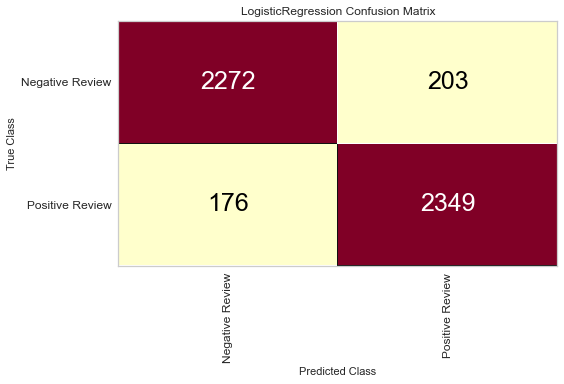

<AxesSubplot:title={'center':'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [56]:
## Not sure how to fix this error

#import libraries
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# confusion matrix and model accuracy on test set

#create class labels for confusion matrix
#classes = ['Positive','Negative']
label_encoder = {0: 'Negative Review', 1: 'Positive Review'}

#initialize the confusion matrix
cm = ConfusionMatrix(logr_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(test_features, y_test)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(test_features, y_test)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display confusion matrix
cm.show()